## **Projet Data Mining (2024-2025)**

**1/ Analyser et visualiser les données**

***Importation des bibliothèques***

In [5599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder, KBinsDiscretizer, PowerTransformer,QuantileTransformer,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer

from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.tree import DecisionTreeClassifier,plot_tree

***| . Analyse exploratoire des données***

1/ Exploration initiale

In [5600]:
df_assurance=pd.read_csv('train_Insurance.csv')
df_assurance

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [5601]:
df_assurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [5602]:
print("il y a 3 attributs qui contient des valeurs nulls: Garden,Building Dimension,Geo_Code")

il y a 3 attributs qui contient des valeurs nulls: Garden,Building Dimension,Geo_Code


2/ Statistique descriptives

In [5603]:
df_assurance.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [5604]:
df_assurance.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

3/ Visualisation

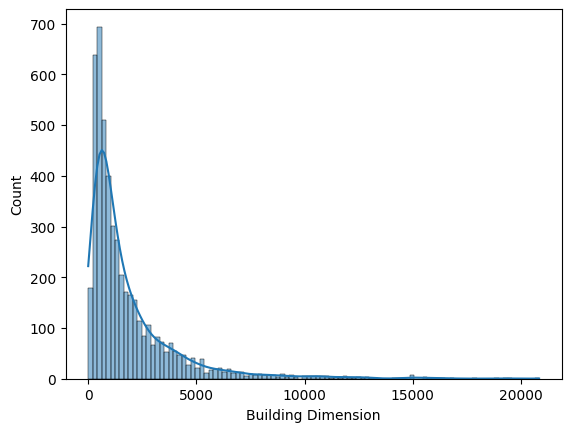

In [5605]:
sns.histplot(df_assurance['Building Dimension'], kde=True)
plt.show()

visualiser le heatmap pour les attributs numériques

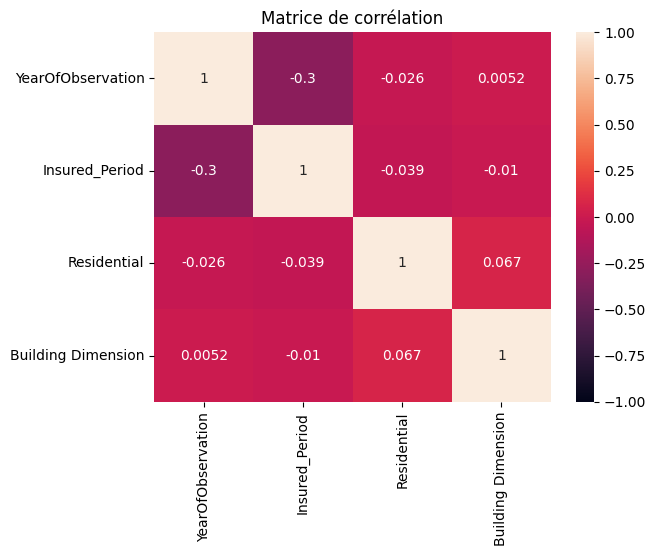

In [5606]:
sns.heatmap(df_assurance.corr(numeric_only=True), annot=True,vmin=-1,vmax=1)
plt.title("Matrice de corrélation")
plt.show()
#d'après ce graphique, on remarque que : 
#(YearOfObservation,Insured_Period)

Boxplot pour vérifier si'il existe des outlires

<Axes: xlabel='Insured_Period', ylabel='YearOfObservation'>

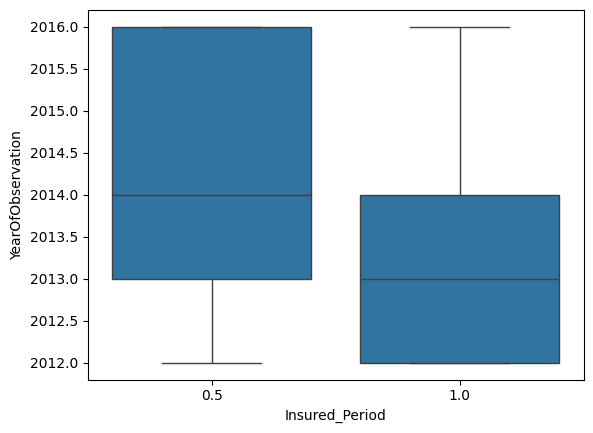

In [5607]:
sns.boxplot(data=df_assurance,x='Insured_Period',y='YearOfObservation')

Visualiser le diagramme à barre pour les attributs discréts

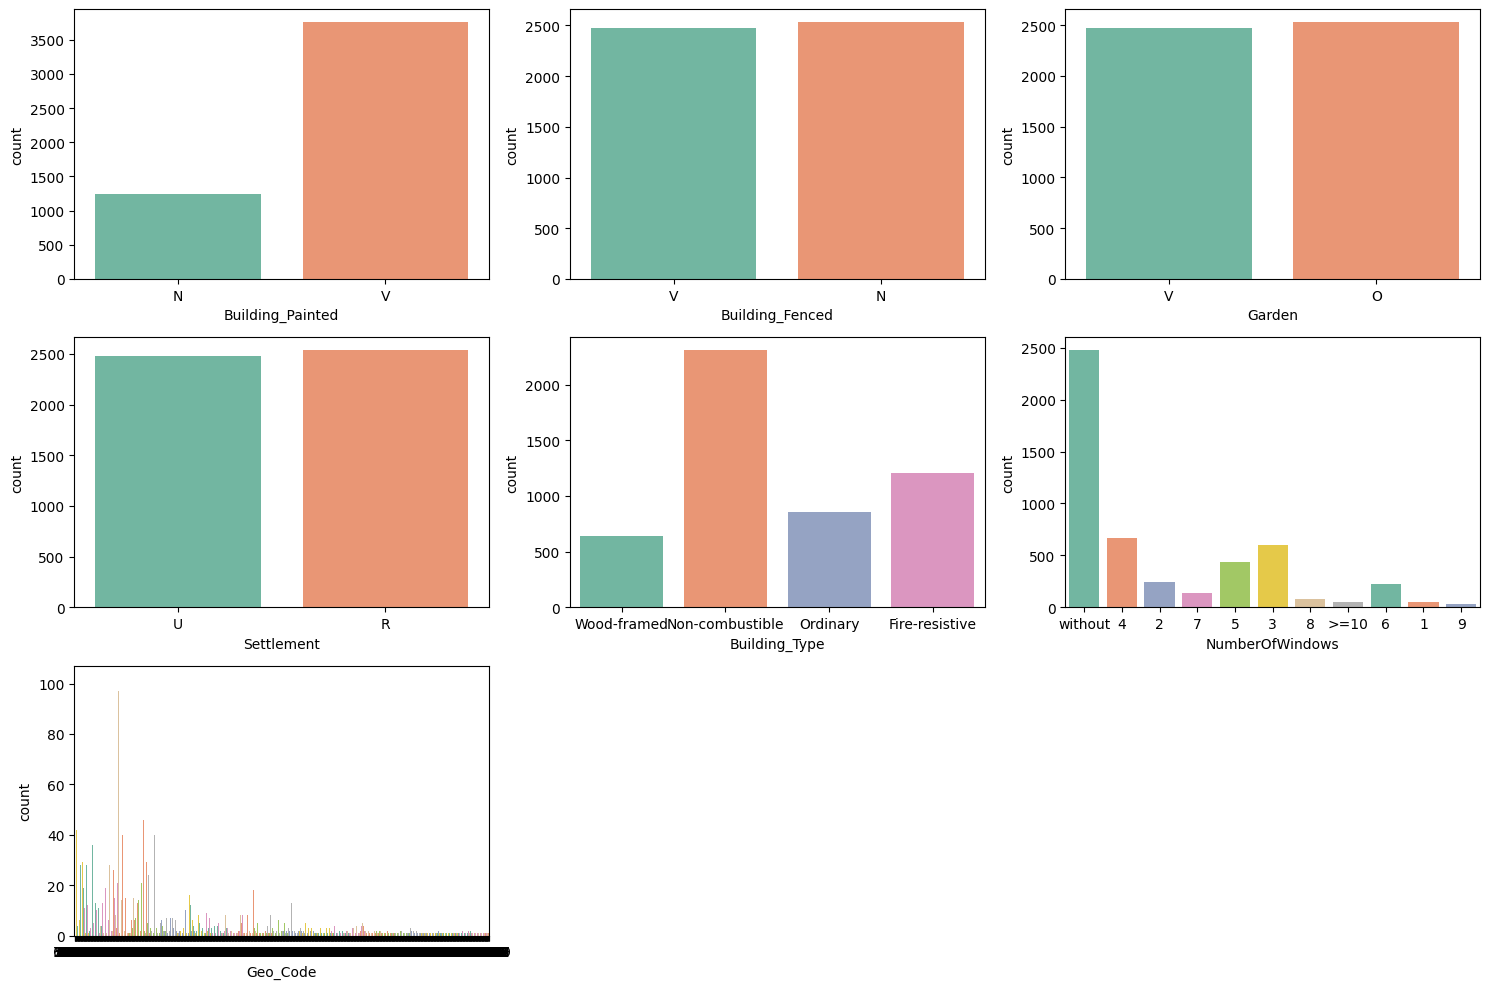

In [5608]:
plt.figure(figsize=(15,10))
l_discret=list(df_assurance.iloc[:,1:-1].select_dtypes(include="object"))
for i in range(len(l_discret)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=l_discret[i], data=df_assurance,palette="Set2",hue=l_discret[i],legend=False)
plt.tight_layout()
plt.show()
#vision globale

4/ Detection des anomalies

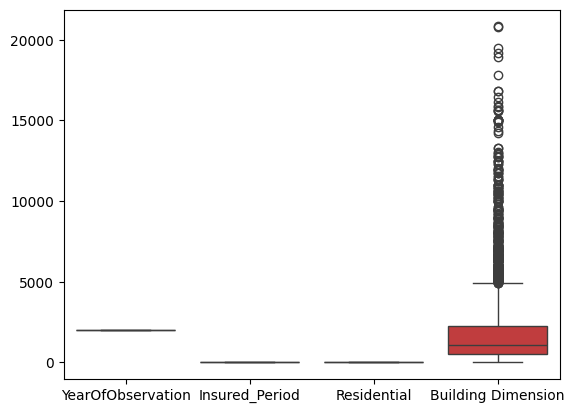

In [5609]:
list_Continue=list(df_assurance.select_dtypes(include='number'))
sns.boxplot(data=df_assurance[list_Continue])
plt.show()
#building dim fiha barcha outlires donc ma nejmouch nlamdouhem f upper limit 5ater tfesed data mte3ek

5/ Identification des valeurs manquantes NaN

In [5610]:
df_assurance.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

6/ Détection des lignes dupliquées

In [5611]:
df_assurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5007    False
5008    False
5009    False
5010    False
5011    False
Length: 5012, dtype: bool

***|| . Data Pré-Processing***

1/ Nettoyage des données

a- suppression de l'attribut Geo_Code

In [5612]:
df_assurance.drop(labels=["Geo_Code"],axis=1, inplace=True)

b- Traitement des NaN: Building dimension et Garden

In [5613]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_assurance[['Garden']]=mf_imputer.fit_transform(df_assurance.loc[:,['Garden']])

In [5614]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df_assurance[['Building Dimension']]=mf_imputer.fit_transform(df_assurance.loc[:,['Building Dimension']])
df_assurance.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,non
5011,H18228,2013,1.0,1,V,V,V,U,1067.0,Wood-framed,without,non


In [5615]:
df_assurance=df_assurance.iloc[:,1:]
df_assurance1=df_assurance[df_assurance.duplicated()]
df_assurance1
df_assurance.drop_duplicates(inplace=True,ignore_index=True)
df_assurance

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,oui
4,2016,0.5,0,N,V,V,U,2675.0,Ordinary,without,non
...,...,...,...,...,...,...,...,...,...,...,...
4754,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,oui
4755,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,non
4756,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,non
4757,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,non


2/ Transformation des données

a- Changement des valeurs dans la colonne NumberOfWindows

In [5616]:
df_assurance['NumberOfWindows']=np.where(df_assurance['NumberOfWindows']==">=10",10,df_assurance['NumberOfWindows'])
df_assurance['NumberOfWindows']=np.where(df_assurance['NumberOfWindows']=="without",0,df_assurance['NumberOfWindows'])
df_assurance["NumberOfWindows"]=df_assurance["NumberOfWindows"].astype("int32")

In [5617]:
df_assurance

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,0,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,0,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,0,oui
4,2016,0.5,0,N,V,V,U,2675.0,Ordinary,0,non
...,...,...,...,...,...,...,...,...,...,...,...
4754,2013,1.0,0,N,V,V,U,550.0,Ordinary,0,oui
4755,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,non
4756,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,non
4757,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,non


b-Normaliser les valeurs de : YearOfObservation,Building_Painted,Building_Fenced,Settlement,Building_Type,Garden,Insured_Period

In [5618]:
ct = ColumnTransformer(
    [
        ('encoder_1', OneHotEncoder(categories=[['2012', '2013', '2014', '2015', '2016']]), ["YearOfObservation"]),
        ('encoder_2', OrdinalEncoder(categories=[['V','N']]), ["Building_Painted"]),  
        ('encoder_3', OrdinalEncoder(categories=[['V','N']]), ["Building_Fenced"]),  
        ('encoder_4', OrdinalEncoder(), ["Settlement"]),  
        ('encoder_5', OneHotEncoder(categories=[['Wood-framed', 'Non-combustible', 'Ordinary', 'Fire-resistive']]), ["Building_Type"]),
        ('encoder_6', OrdinalEncoder(), ["Garden"]),
        ('encoder_7', OrdinalEncoder(), ["Insured_Period"]),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

arr = ct.fit_transform(df_assurance)

final_columns = ct.get_feature_names_out()

df_assurance = pd.DataFrame(arr, columns=final_columns)

df_assurance.columns = [col.replace("Building_Type_", "") for col in df_assurance.columns]
df_assurance.columns = [col.replace("YearOfObservation_", "") for col in df_assurance.columns]


df_assurance


,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows,Claim
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1240.0,0,non
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,900.0,0,non
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4984.0,4,oui
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,600.0,0,oui
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,2675.0,0,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,550.0,0,oui
4755,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1000.0,4,non
4756,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,480.0,3,non
4757,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,536.0,4,non


c- Normalisation de Building Dimension

In [5619]:
standard_scaler= RobustScaler()
df_assurance[["Building Dimension"]]= standard_scaler.fit_transform(df_assurance[["Building Dimension"]])

<Axes: xlabel='Building Dimension', ylabel='Density'>

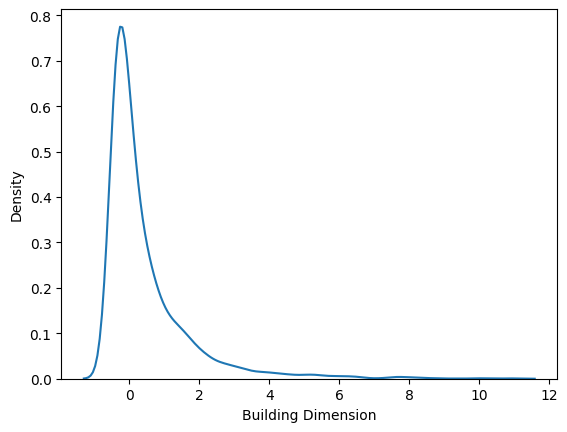

In [5620]:
sns.kdeplot(df_assurance['Building Dimension'],bw_method='scott',bw_adjust=1)

<Axes: ylabel='Density'>

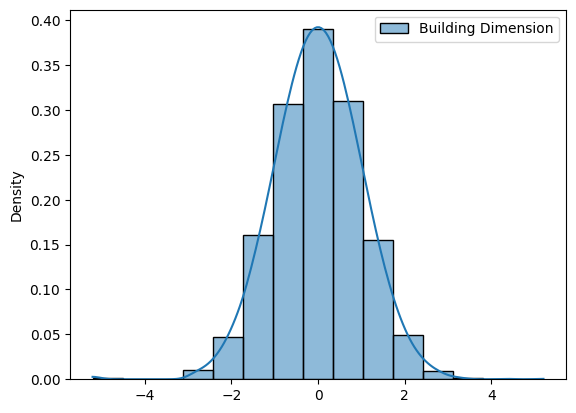

In [5621]:
transformer = QuantileTransformer(output_distribution='normal') #ou 'uniform'
df_assurance[["Building Dimension"]] = transformer.fit_transform(df_assurance[["Building Dimension"]])
sns.histplot(df_assurance[["Building Dimension"]], bins=15, kde=True, stat='density')

3/ Discrétisation 

a- Discrétisation de l'attribut NumberOfWindows

In [5622]:
enc = KBinsDiscretizer(n_bins=2, encode='ordinal',strategy='quantile', subsample=len(df_assurance))
df_assurance['NumberOfWindows'] = enc.fit_transform(df_assurance[['NumberOfWindows']])

<Axes: xlabel='NumberOfWindows', ylabel='Density'>

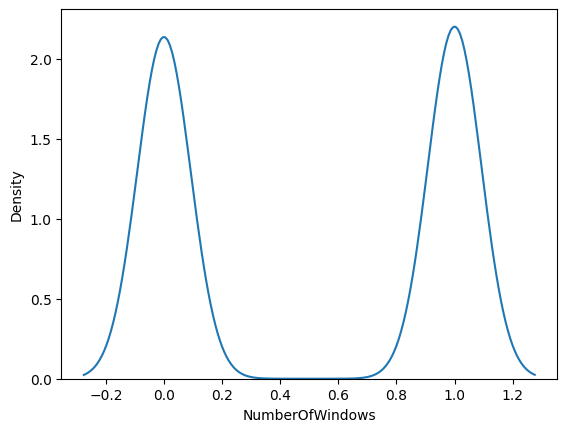

In [5623]:
sns.kdeplot(df_assurance['NumberOfWindows'],bw_method='scott',bw_adjust=1)

4/Réduction de données

a-visualisation 

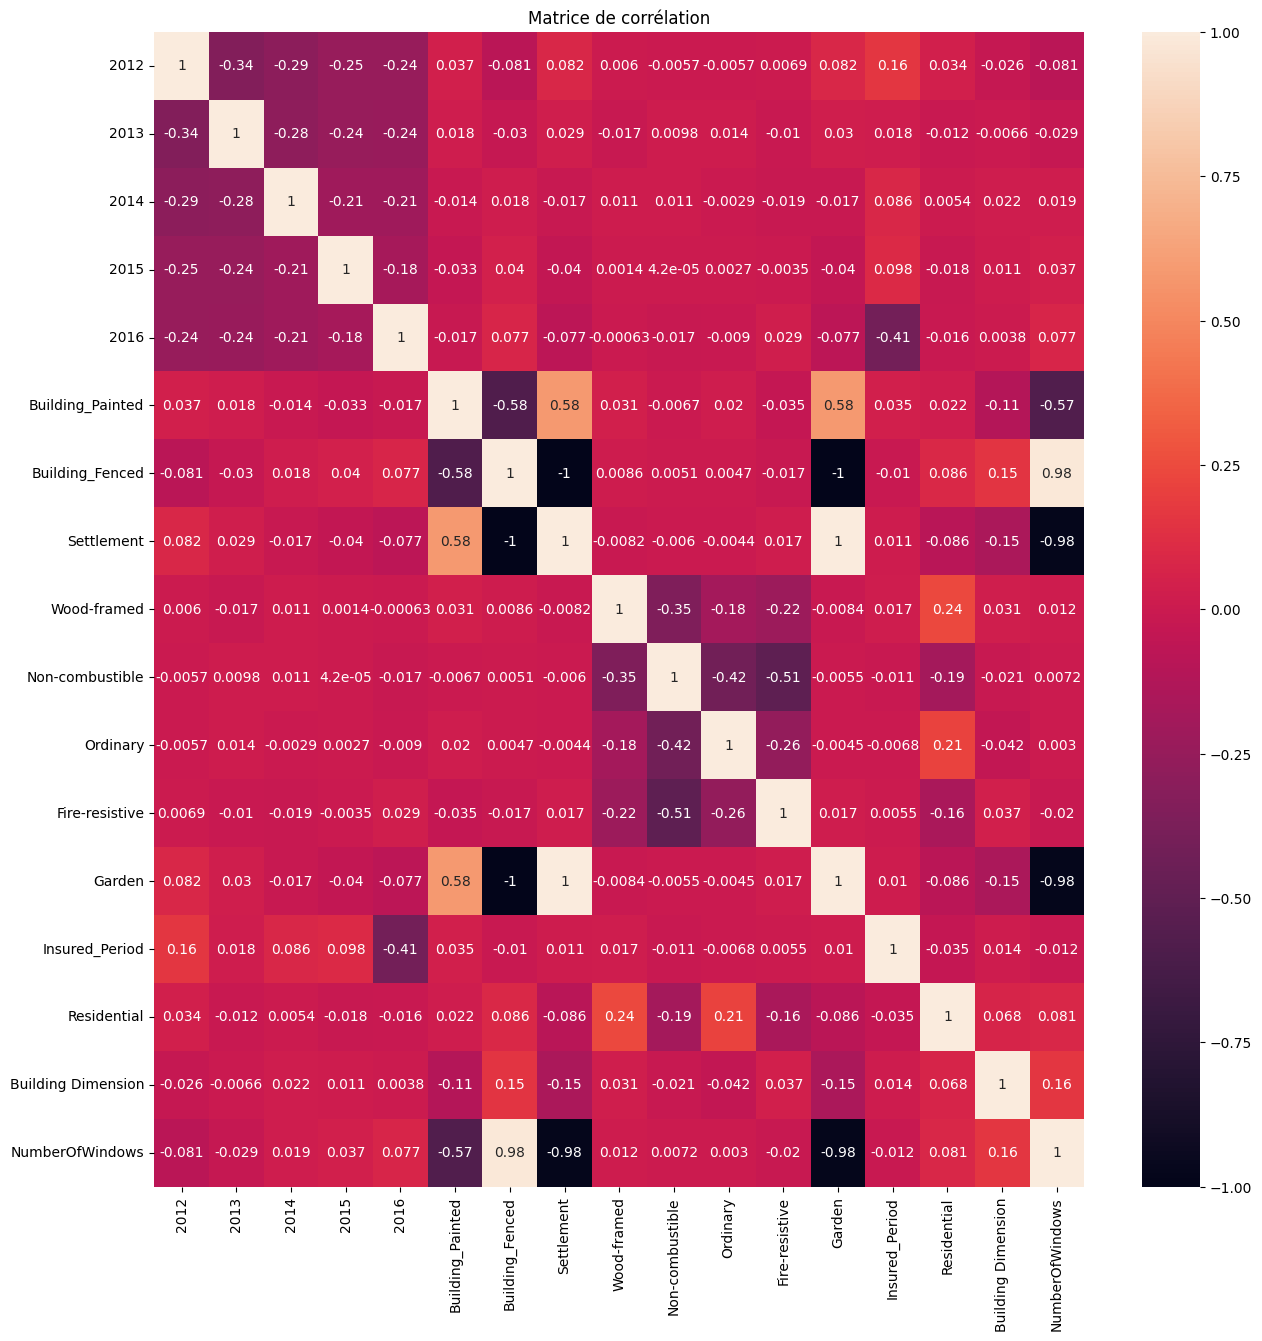

In [5624]:
plt.figure(figsize=(15,15))
sns.heatmap(df_assurance.iloc[:,:-1].corr(), annot=True,vmin=-1,vmax=1)
plt.title("Matrice de corrélation")
plt.show()

b-Selection des descripteurs : Methode Embedded

In [5625]:
X=df_assurance.iloc[:,:-1]
X

,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.107560,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,-0.194422,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.417111,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,-0.586473,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.778406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,-0.665852,0.0
4755,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.105580,1.0
4756,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,-0.814401,1.0
4757,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.689403,1.0


In [5626]:
from sklearn.model_selection import train_test_split
X=df_assurance.iloc[:,:-1].to_numpy() 
Y=df_assurance.iloc[:,-1].to_numpy()
# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

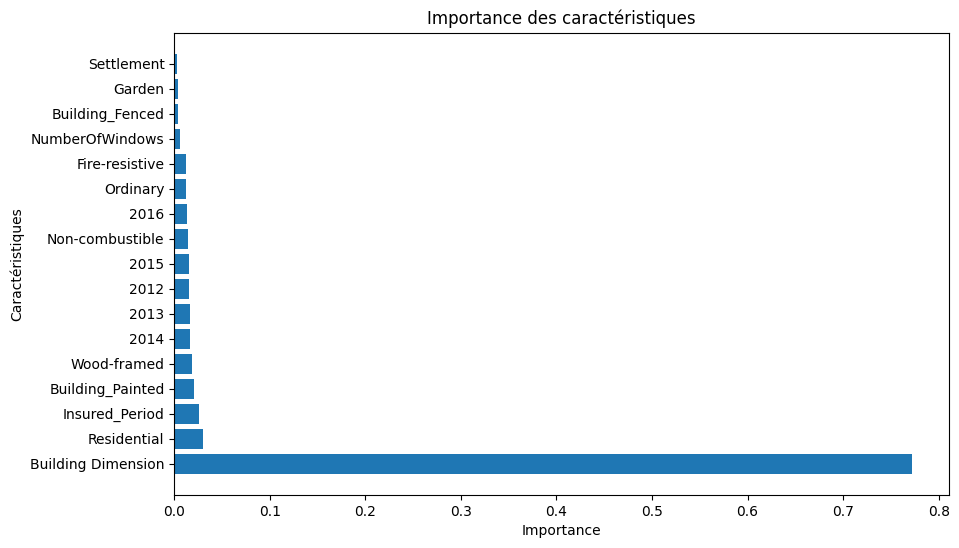

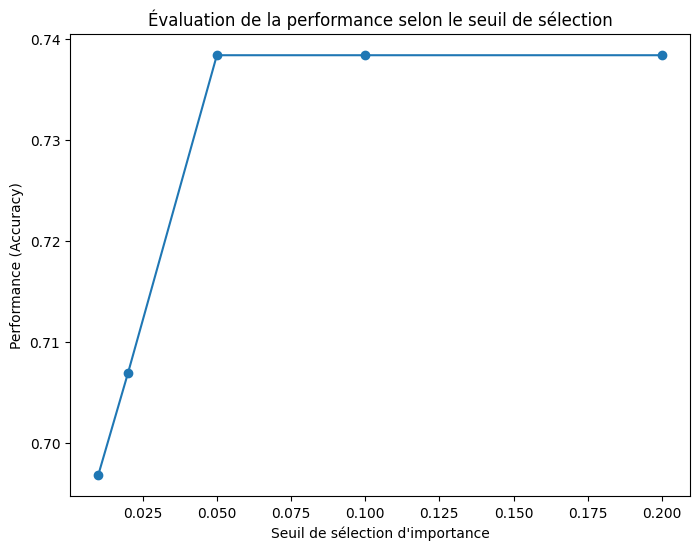

Le seuil optimal est : 0.05


In [5627]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt


# Entraîner un modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42,bootstrap=True, oob_score=True)
rf.fit(X_train, y_train)

# Extraire l'importance des caractéristiques
importances = rf.feature_importances_
feature_names = df_assurance.iloc[:,:-1].columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
important_features = important_features.sort_values(by='Importance', ascending=False)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(10,6))
plt.barh(important_features['Feature'], important_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques')
plt.show()

# Essayer différents seuils et évaluer la performance
thresholds = [0.01, 0.02, 0.05, 0.1, 0.2]
scores = []

for threshold in thresholds:
    # Sélectionner les caractéristiques au-dessus du seuil
    selected_features = important_features[important_features['Importance'] > threshold]['Feature']
    X_selected = df_assurance[selected_features]
    
    # Effectuer une validation croisée
    score = cross_val_score(rf, X_selected, Y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Afficher les résultats
plt.figure(figsize=(8, 6))
plt.plot(thresholds, scores, marker='o')
plt.xlabel('Seuil de sélection d\'importance')
plt.ylabel('Performance (Accuracy)')
plt.title('Évaluation de la performance selon le seuil de sélection')
plt.show()

# Trouver le seuil optimal basé sur les performances
optimal_threshold = thresholds[scores.index(max(scores))]
print(f"Le seuil optimal est : {optimal_threshold}")


In [5628]:
important_features['Importance']

15    0.772507
14    0.029657
13    0.025498
5     0.021025
8     0.018690
2     0.016852
1     0.016497
0     0.015470
3     0.015140
9     0.014679
4     0.012932
10    0.012713
11    0.012094
16    0.005722
6     0.004121
12    0.003380
7     0.003020
Name: Importance, dtype: float64

In [5629]:
s=VarianceThreshold(threshold=0.05)
arr= s.fit_transform(df_assurance.iloc[:,:-1])
# Obtenir les indices des colonnes non-supprimées
ind_col= s.get_support(indices=True) #[0 1 2 4 5 6]
df_assurance=pd.DataFrame(arr,columns=list(df_assurance.iloc[:,ind_col]))
df_assurance

,2012,2013,2014,2015,2016,Building_Painted,Building_Fenced,Settlement,Wood-framed,Non-combustible,Ordinary,Fire-resistive,Garden,Insured_Period,Residential,Building Dimension,NumberOfWindows
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.10756,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,-0.194422,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.417111,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,-0.586473,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.778406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,-0.665852,0.0
4755,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.10558,1.0
4756,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,-0.814401,1.0
4757,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.689403,1.0


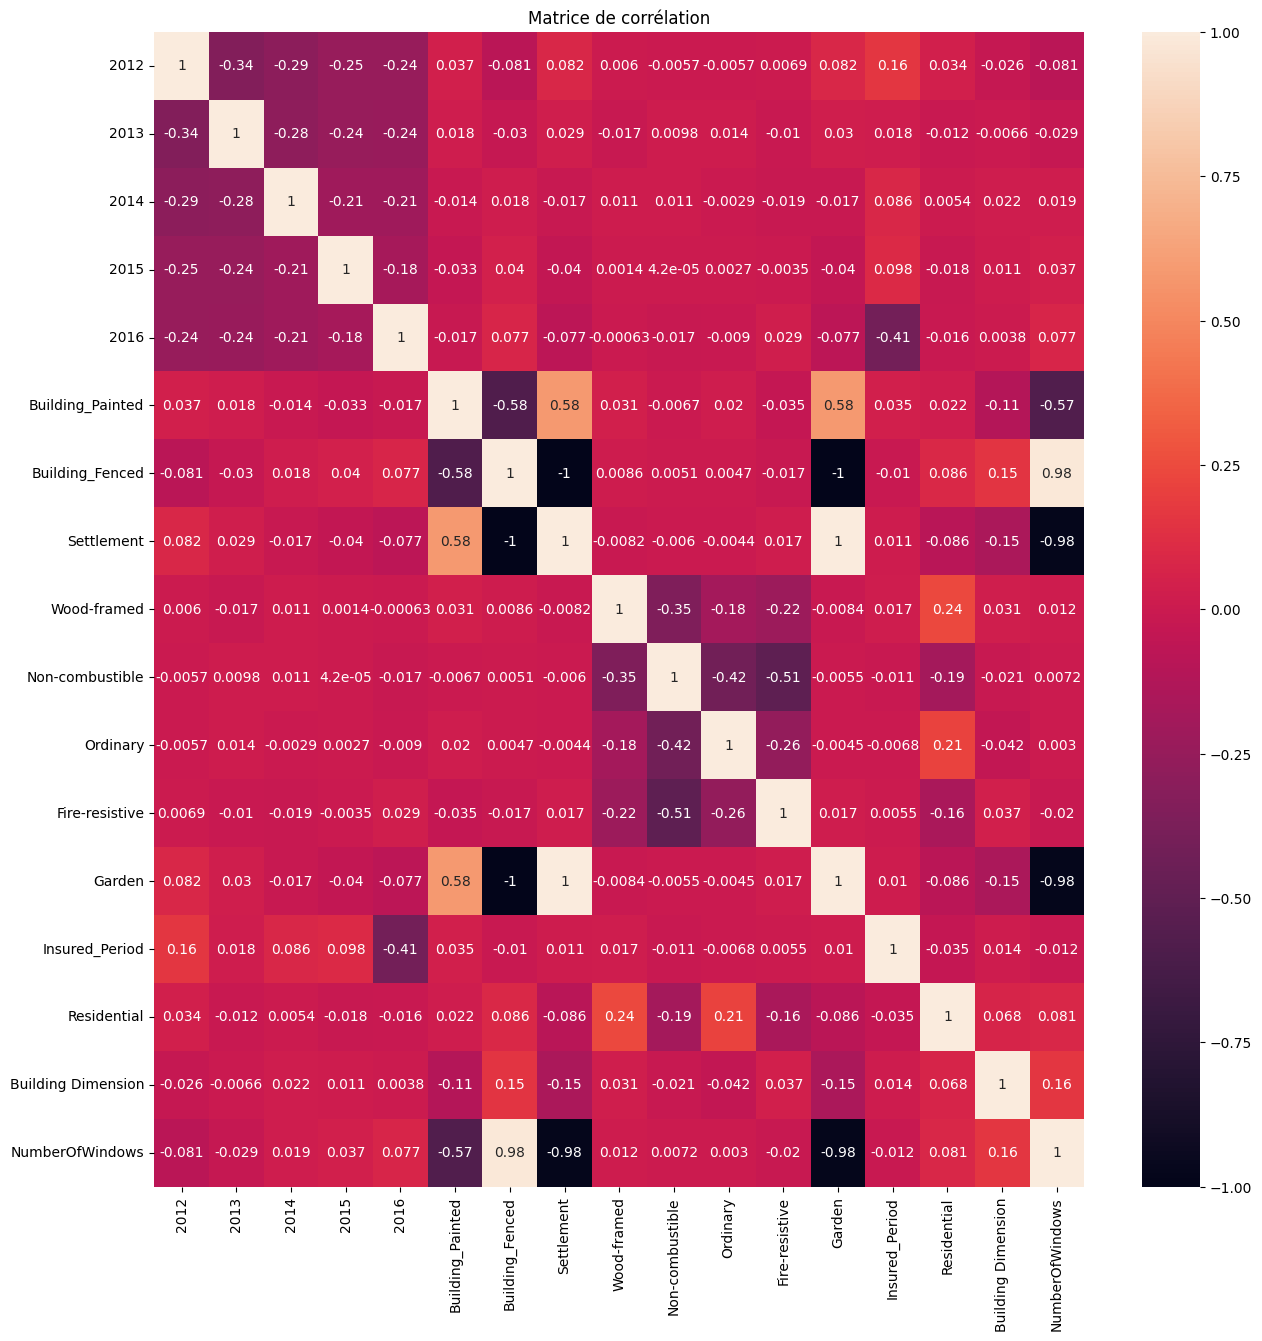

In [5630]:
plt.figure(figsize=(15,15))
sns.heatmap(df_assurance.corr(), annot=True,vmin=-1,vmax=1)
plt.title("Matrice de corrélation")
plt.show()

In [5632]:
f_items=apriori(df_assurance.astype("bool"),min_support=0.05,use_colnames=True)
rules_p=association_rules(f_items, metric="confidence", min_threshold=0.05)
def gener_regles(df_rules, cond="antecedents", res="consequents"):
  ant=map(lambda x : list(map(lambda y: y, x)), df_rules[cond])
  conseq=map(lambda x : list(map(lambda y: y, x)), df_rules[res])
  return "\n ".join(map(lambda x, y : ", ".join(x)+"-->"+", ".join(y) ,ant, conseq))
rules_p.sort_values(by="lift", ascending=False, inplace=True)
print(gener_regles(rules_p))

Building Dimension, Ordinary, Building_Fenced-->Residential, NumberOfWindows
 Ordinary, Building_Fenced-->Residential, Building Dimension, NumberOfWindows
 Ordinary, Building_Fenced-->Residential, NumberOfWindows
 Residential, Building Dimension, NumberOfWindows-->Ordinary, Building_Fenced
 Residential, NumberOfWindows-->Building Dimension, Ordinary, Building_Fenced
 Residential, NumberOfWindows-->Ordinary, Building_Fenced
 Building Dimension, Ordinary, NumberOfWindows-->Residential, Building_Fenced
 Ordinary, NumberOfWindows-->Residential, Building Dimension, Building_Fenced
 Ordinary, NumberOfWindows-->Residential, Building_Fenced
 Residential, Building Dimension, Building_Fenced-->Ordinary, NumberOfWindows
 Residential, Building_Fenced-->Ordinary, NumberOfWindows
 Residential, Building_Fenced-->Building Dimension, Ordinary, NumberOfWindows
 Residential, Insured_Period, Garden-->Settlement, Building_Painted, Building Dimension
 Settlement, Building Dimension, Residential, Insured_Per